<a href="https://colab.research.google.com/github/handsomekiwi/JupyterPractice/blob/master/ML_course_HW/Y2019%20HW10_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
import matplotlib.pyplot as plt 
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalMaxPooling2D,BatchNormalization
import os  

Using TensorFlow backend.


In [0]:
def isDisplayAvl():  
    return 'DISPLAY' in os.environ.keys()  

In [0]:
def plot_image(image):  
    fig = plt.gcf()  
    fig.set_size_inches(2,2)  
    plt.imshow(image, cmap='binary')  
    plt.show()  

In [0]:
def plot_images_labels_predict(images, labels, prediction, idx, num=10):  
    fig = plt.gcf()  
    fig.set_size_inches(12, 14)  
    if num > 25: num = 25  
    for i in range(0, num):  
        ax=plt.subplot(5,5, 1+i)  
        ax.imshow(images[idx], cmap='binary')  
        title = "l=" + str(labels[idx])  
        if len(prediction) > 0:  
            title = "l={},p={}".format(str(labels[idx]), str(prediction[idx]))  
        else:  
            title = "l={}".format(str(labels[idx]))  
        ax.set_title(title, fontsize=10)  
        ax.set_xticks([]); ax.set_yticks([])  
        idx+=1  
    plt.show()  

In [0]:
def show_train_history(train_history, train, validation):  
    plt.plot(train_history.history[train])  
    plt.plot(train_history.history[validation])  
    plt.title('Train History')  
    plt.ylabel(train)  
    plt.xlabel('Epoch')  
    plt.legend(['train', 'validation'], loc='upper left')  
    plt.show() 

In [0]:
np.random.seed(10)

In [7]:
#Cifra-10 有50000筆training data 10000筆testing data 32*32的彩色圖片 共10類
(x_train_image, y_train_label), (x_test_image, y_test_label)=cifar10.load_data()


170500096/170498071 [==============================] - 2s 0us/step


In [0]:
# normalize and onehot
x_train_normalize=x_train_image.astype('float32')/255.0
x_test_normalize=x_test_image.astype('float32')/255.0  


y_train_onehot=np_utils.to_categorical(y_train_label)
y_test_onehot=np_utils.to_categorical(y_test_label)

In [0]:

#create model
model=Sequential()

model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 padding='same',
                 input_shape=(32,32,3),
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 padding='same', 
                 input_shape=(16,16,3),
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))


model.add(Flatten())

model.add(Dense(1024, activation='relu'))

model.add(Dropout(0.25))

model.add(Dense(1024, activation='relu'))

model.add(Dropout(0.25))

model.add(Dense(10,activation='softmax'))

In [0]:
#show the model
model.summary()  
print("") 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_80 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_77 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_136 (Dropout)        (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_78 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_137 (Dropout)        (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_29 (Flatten)         (None, 4096)              0         
__________

In [0]:
#create model
model=Sequential()

model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 padding='same',
                 input_shape=(32,32,3)))
                
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 padding='same', 
                 input_shape=(16,16,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(0.25))

model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(0.25))

model.add(Dense(10,activation='softmax'))

model.summary()  
print("") 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_94 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_10 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
activation_51 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_91 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_164 (Dropout)        (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_11 (Batc (None, 16, 16, 64)        256       
__________

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
 - 16s - loss: 0.4330 - acc: 0.8448 - val_loss: 0.7821 - val_acc: 0.7524
Epoch 2/20
 - 11s - loss: 0.3723 - acc: 0.8677 - val_loss: 0.9702 - val_acc: 0.7102
Epoch 3/20
 - 11s - loss: 0.3340 - acc: 0.8812 - val_loss: 1.0680 - val_acc: 0.6949
Epoch 4/20
 - 11s - loss: 0.2941 - acc: 0.8950 - val_loss: 1.0290 - val_acc: 0.7178
Epoch 5/20
 - 11s - loss: 0.2644 - acc: 0.9062 - val_loss: 0.8080 - val_acc: 0.7658
Epoch 6/20
 - 11s - loss: 0.2389 - acc: 0.9143 - val_loss: 1.7369 - val_acc: 0.6133
Epoch 7/20
 - 11s - loss: 0.2207 - acc: 0.9219 - val_loss: 0.9343 - val_acc: 0.7500
Epoch 8/20
 - 11s - loss: 0.2016 - acc: 0.9289 - val_loss: 1.5276 - val_acc: 0.6436
Epoch 9/20
 - 11s - loss: 0.1913 - acc: 0.9315 - val_loss: 1.1007 - val_acc: 0.7343
Epoch 10/20
 - 11s - loss: 0.1801 - acc: 0.9357 - val_loss: 1.0805 - val_acc: 0.7358
Epoch 11/20
 - 11s - loss: 0.1620 - acc: 0.9423 - val_loss: 1.1555 - val_acc: 0.7211
Epoch 12/20
 - 11s - los

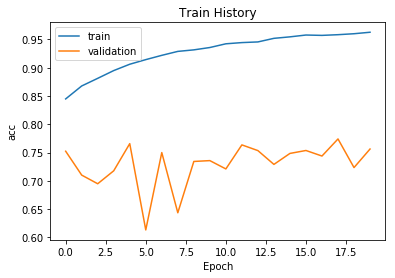

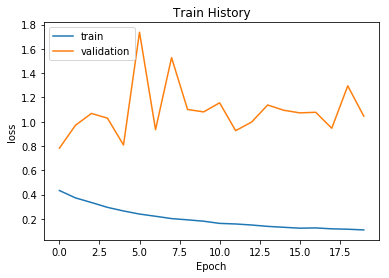

10000/10000 [==============================] - 2s 152us/step

	[Info] Accuracy of testing data = 74.7%


In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

train_history=model.fit(x=x_train_normalize, y=y_train_onehot, validation_split=0.2, epochs=10, batch_size=128,verbose=2)
show_train_history(train_history, 'acc', 'val_acc')
show_train_history(train_history, 'loss', 'val_loss')
scores = model.evaluate(x_test_normalize, y_test_onehot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0)) 

In [0]:
# 原始71.8
#Dropout增減有影響 
# 後面filter數沒增加，準確率越小 epoch 訓練多有機會找到好 73%-74.7%
#多增加convolution 有助於model解析特徵
#對每個neuron到激勵函數間 做正規化(batch normalizaton有助於正確率提升 73%

In [9]:
#create model
model=Sequential()

model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 padding='same',
                 input_shape=(32,32,3),
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 padding='same', 
                 input_shape=(16,16,3),
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))


model.add(Flatten())

model.add(Dense(1024, activation='relu'))

model.add(Dropout(0.25))

model.add(Dense(1024, activation='relu'))

model.add(Dropout(0.25))

model.add(Dense(10,activation='softmax'))
#show the model
model.summary()  
print("") 

W0827 00:34:54.751869 140319357306752 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0827 00:34:54.792111 140319357306752 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0827 00:34:54.799527 140319357306752 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0827 00:34:54.827896 140319357306752 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0827 00:34:54.830192 140319357306752 deprecation_wrapp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

W0827 00:35:32.963353 140319357306752 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0827 00:35:32.992553 140319357306752 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0827 00:35:33.116271 140319357306752 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 40000 samples, validate on 10000 samples
Epoch 1/10
 - 14s - loss: 1.5822 - acc: 0.4170 - val_loss: 1.2832 - val_acc: 0.5412
Epoch 2/10
 - 8s - loss: 1.1769 - acc: 0.5793 - val_loss: 1.0570 - val_acc: 0.6264
Epoch 3/10
 - 8s - loss: 1.0182 - acc: 0.6399 - val_loss: 0.9329 - val_acc: 0.6735
Epoch 4/10
 - 8s - loss: 0.9067 - acc: 0.6796 - val_loss: 0.8586 - val_acc: 0.7028
Epoch 5/10
 - 8s - loss: 0.8142 - acc: 0.7093 - val_loss: 0.8129 - val_acc: 0.7198
Epoch 6/10
 - 8s - loss: 0.7289 - acc: 0.7413 - val_loss: 0.8527 - val_acc: 0.7069
Epoch 7/10
 - 8s - loss: 0.6536 - acc: 0.7679 - val_loss: 0.8441 - val_acc: 0.7190
Epoch 8/10
 - 8s - loss: 0.5835 - acc: 0.7949 - val_loss: 0.7815 - val_acc: 0.7417
Epoch 9/10
 - 8s - loss: 0.5186 - acc: 0.8136 - val_loss: 0.8591 - val_acc: 0.7201
Epoch 10/10
 - 8s - loss: 0.4673 - acc: 0.8360 - val_loss: 0.8192 - val_acc: 0.7347


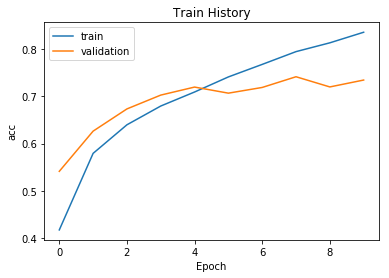

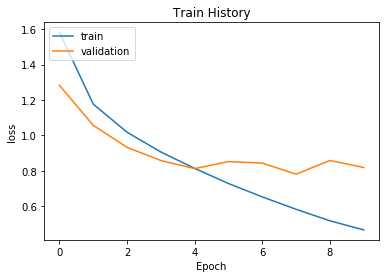

10000/10000 [==============================] - 1s 110us/step

	[Info] Accuracy of testing data = 72.8%


In [10]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

train_history=model.fit(x=x_train_normalize, y=y_train_onehot, validation_split=0.2, epochs=10, batch_size=128,verbose=2)
show_train_history(train_history, 'acc', 'val_acc')
show_train_history(train_history, 'loss', 'val_loss')
scores = model.evaluate(x_test_normalize, y_test_onehot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0)) 

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
 - 7s - loss: 1.1557 - acc: 0.6663 - val_loss: 0.9467 - val_acc: 0.6952
Epoch 2/10
 - 6s - loss: 0.5637 - acc: 0.8016 - val_loss: 0.9292 - val_acc: 0.7063
Epoch 3/10
 - 6s - loss: 0.4898 - acc: 0.8263 - val_loss: 0.8974 - val_acc: 0.7162
Epoch 4/10
 - 6s - loss: 0.4664 - acc: 0.8350 - val_loss: 0.8924 - val_acc: 0.7149
Epoch 5/10
 - 6s - loss: 0.4310 - acc: 0.8488 - val_loss: 0.9304 - val_acc: 0.7216
Epoch 6/10
 - 6s - loss: 0.4232 - acc: 0.8505 - val_loss: 1.0485 - val_acc: 0.7023
Epoch 7/10
 - 6s - loss: 0.4054 - acc: 0.8563 - val_loss: 0.8919 - val_acc: 0.7301
Epoch 8/10
 - 6s - loss: 0.3924 - acc: 0.8621 - val_loss: 0.8623 - val_acc: 0.7429
Epoch 9/10
 - 6s - loss: 0.3805 - acc: 0.8652 - val_loss: 0.9098 - val_acc: 0.7201
Epoch 10/10
 - 6s - loss: 0.3742 - acc: 0.8688 - val_loss: 1.0395 - val_acc: 0.7018


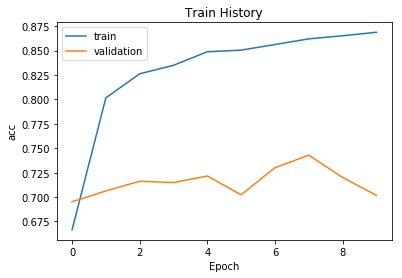

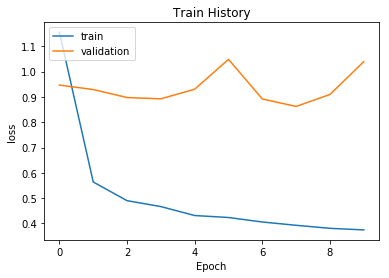

10000/10000 [==============================] - 1s 107us/step

	[Info] Accuracy of testing data = 69.5%


In [11]:
model.compile(loss='categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])

train_history=model.fit(x=x_train_normalize, y=y_train_onehot, validation_split=0.2, epochs=10, batch_size=128,verbose=2)
show_train_history(train_history, 'acc', 'val_acc')
show_train_history(train_history, 'loss', 'val_loss')
scores = model.evaluate(x_test_normalize, y_test_onehot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0)) 

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
 - 7s - loss: 0.8166 - acc: 0.8088 - val_loss: 0.8161 - val_acc: 0.7447
Epoch 2/10
 - 7s - loss: 0.3311 - acc: 0.8830 - val_loss: 0.8302 - val_acc: 0.7560
Epoch 3/10
 - 7s - loss: 0.2910 - acc: 0.8976 - val_loss: 0.8446 - val_acc: 0.7542
Epoch 4/10
 - 7s - loss: 0.2620 - acc: 0.9060 - val_loss: 0.8626 - val_acc: 0.7600
Epoch 5/10
 - 7s - loss: 0.2329 - acc: 0.9168 - val_loss: 0.9106 - val_acc: 0.7536
Epoch 6/10
 - 7s - loss: 0.2181 - acc: 0.9229 - val_loss: 0.8986 - val_acc: 0.7566
Epoch 7/10
 - 7s - loss: 0.2046 - acc: 0.9284 - val_loss: 0.8968 - val_acc: 0.7614
Epoch 8/10
 - 7s - loss: 0.1931 - acc: 0.9308 - val_loss: 0.9117 - val_acc: 0.7593
Epoch 9/10
 - 7s - loss: 0.1805 - acc: 0.9353 - val_loss: 0.9249 - val_acc: 0.7580
Epoch 10/10
 - 7s - loss: 0.1692 - acc: 0.9400 - val_loss: 0.9573 - val_acc: 0.7558


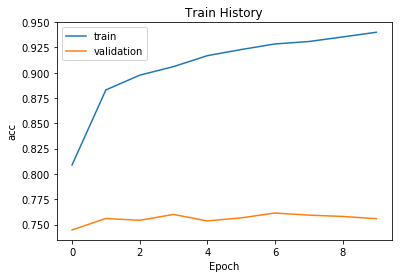

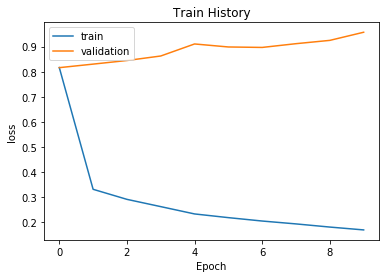

10000/10000 [==============================] - 1s 109us/step

	[Info] Accuracy of testing data = 74.8%


In [12]:
model.compile(loss='categorical_crossentropy',optimizer='Adagrad',metrics=['accuracy'])

train_history=model.fit(x=x_train_normalize, y=y_train_onehot, validation_split=0.2, epochs=10, batch_size=128,verbose=2)
show_train_history(train_history, 'acc', 'val_acc')
show_train_history(train_history, 'loss', 'val_loss')
scores = model.evaluate(x_test_normalize, y_test_onehot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0)) 

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
 - 7s - loss: 0.9257 - acc: 0.6984 - val_loss: 0.9894 - val_acc: 0.6958
Epoch 2/10
 - 6s - loss: 0.4917 - acc: 0.8287 - val_loss: 1.0158 - val_acc: 0.7027
Epoch 3/10
 - 6s - loss: 0.4174 - acc: 0.8551 - val_loss: 1.0002 - val_acc: 0.7203
Epoch 4/10
 - 6s - loss: 0.3704 - acc: 0.8703 - val_loss: 0.9757 - val_acc: 0.7189
Epoch 5/10
 - 6s - loss: 0.3535 - acc: 0.8759 - val_loss: 1.0089 - val_acc: 0.7225
Epoch 6/10
 - 6s - loss: 0.3332 - acc: 0.8836 - val_loss: 1.0407 - val_acc: 0.7152
Epoch 7/10
 - 6s - loss: 0.3093 - acc: 0.8929 - val_loss: 1.0151 - val_acc: 0.7258
Epoch 8/10
 - 6s - loss: 0.3079 - acc: 0.8914 - val_loss: 0.9948 - val_acc: 0.7273
Epoch 9/10
 - 6s - loss: 0.2895 - acc: 0.8987 - val_loss: 1.0387 - val_acc: 0.7296
Epoch 10/10
 - 6s - loss: 0.2853 - acc: 0.8993 - val_loss: 1.0183 - val_acc: 0.7319


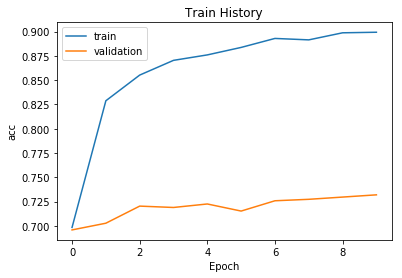

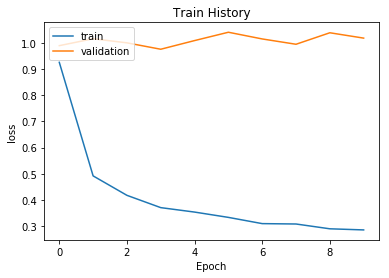

10000/10000 [==============================] - 1s 113us/step

	[Info] Accuracy of testing data = 72.8%


In [16]:
from keras.optimizers import SGD
sgd = SGD(momentum=0.9)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

train_history=model.fit(x=x_train_normalize, y=y_train_onehot, validation_split=0.2, epochs=10, batch_size=128,verbose=2)
show_train_history(train_history, 'acc', 'val_acc')
show_train_history(train_history, 'loss', 'val_loss')
scores = model.evaluate(x_test_normalize, y_test_onehot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0)) 

In [0]:
#adam 72.8
#sgd 69.5
#sgd momentum=0.9 72.8
#adagrad 74.8